# Predict Diabetes
## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
print(matplotlib.__version__)

%matplotlib inline

2.2.2


# Load and review data

In [2]:
df = pd.read_csv("./data/pima-data.csv") # load the pima data

In [3]:
df.shape

(768, 10)

In [4]:
df.head(5)


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.tail(5)


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [6]:
df.isnull().values.any()

False

In [7]:
def plot_corr(df, size=11):
    """function that plots a graphical correlation matrix of pair of columns in the data frame
    
    input:
      df: pandas dataframe
      size: vertical/horiz size of the plot
      
      displays:
         matrix of correlation between columns blue-cyan-yell-red-darkred > less-to-more correlated
         
    """
    # to reset most of matplotlib to classic, pre-2.0, colors and styles
    matplotlib.style.use('classic') #this is to get the correlation colours the same as the course, otherwise we get lots of yellow meaning correlation
    corr = df.corr() # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr) #color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) #draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) #draw y.. .

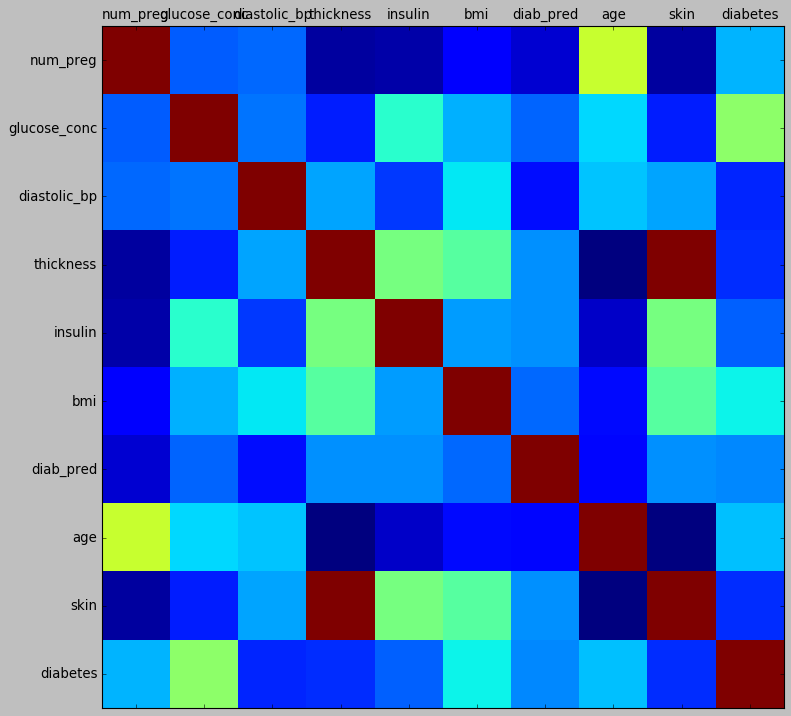

In [8]:
plot_corr(df)
#we should expect a diagonal thru the plot, as we are comparing the features with each other - so of course they will correlate
#However, Skin and Thickness corrolate.  Why is that?  

In [9]:
#So lets look at the correlation figures, to investigate Skin/Thickness
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [10]:
#See the 1.000 running thru the diagnoal? That's what we see in the color plot too
#But see we have the 1.0 in the Skin/Thickness and Thickness/Skin - these two fetures move together, and give us no 
#additional information.  Either change our code to ignore this data, or drop one of the columns
# NB the Skin column in the data was created by converting the Thickness column from inches to mm - so these values will always move in lock step and be correlated

In [11]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [12]:
#If we look closely here, we can see that Skin and Thickness vary in step. 
#But it's really difficult to actually see this when looking at data - so
#that's why it's useful to use the pandas corr function to get a visual representation of it


In [13]:
#we can remove the correlated columns from our data
del df['skin']

In [14]:
#has it gone?
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


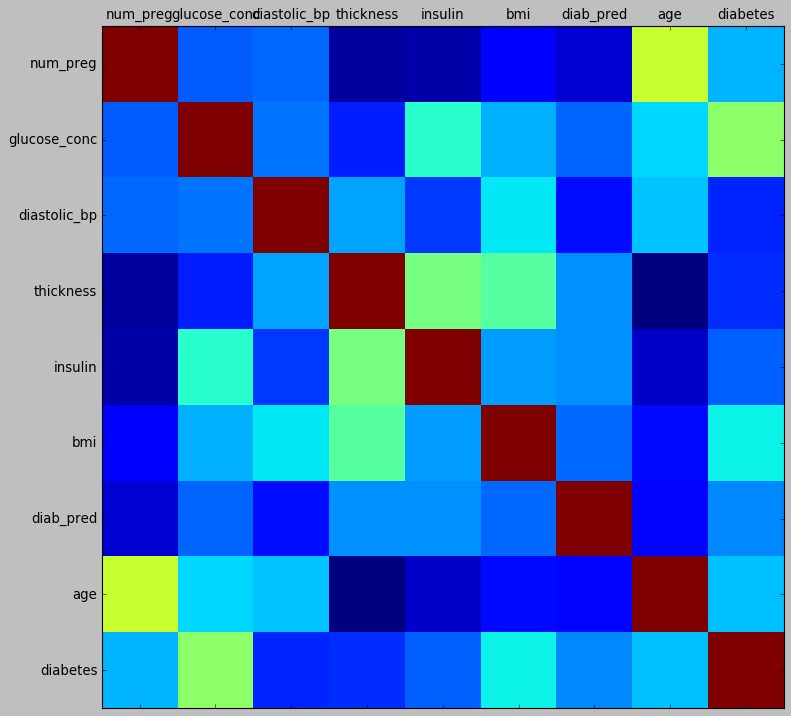

In [15]:
#lets look at the plot - has the red outlier disappeared?
plot_corr(df)

In [16]:
#Great - no other correlated columns, except for those we expect as we are correlated the columns with themselves in the diagonal

# Moulding: Checking Data Types

In [17]:
#Algorithms are mathematical models and work best with numerics
#We still have categorical features tho - e.g. true/falses for diabetes
# We can change True to 1 and False to 0
df.head(3)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True


In [18]:
#Let's use a map to convert these values
diabetes_map = {True:1, False:0}

In [19]:
#the pandas df will do all the iteration for us!
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [20]:
df.head(3)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [21]:
#Bingo! we applied the map to the df and now have 0 and 1s for diabetes
#We now want to check how many true/false diabetes results are already in our data
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])

In [22]:
print("Number of true cases in our source: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true+num_false)) * 100))
print("Number of false cases in our source: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true+num_false)) * 100))

Number of true cases in our source: 268 (34.90%)
Number of false cases in our source: 500 (65.10%)


In [23]:
#We have about 1/3 of cases where diabetes is true in our data so we can reasonably
#train our algorithm.  If we had a lot of weight either way, it would be difficult
#And if we had ZERO instances of the event, we need to use more advanced techniques which are beyond this scope
#Standard prediciton techniques are suitable in this case.


### Splitting the data

In [24]:
#use 70% for training, 30% to verify the quality of the training
#Don't use the test set for the training!! it will bias the model

In [25]:
#Import the split function
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi','diab_pred','age']
predicted_class_names = ['diabetes']

In [27]:
#split our data into two data frames, from training and testing
X = df[feature_col_names].values #predictor feature columns (8 X m)
y = df[predicted_class_names].values #predicted class (1= true, 0=false) column (1 x m)
split_test_size = 0.30

In [28]:
#we pass the data frames to the split function which splits the original data frames and returns 4 numpy arrays
#These arrays contain the values of the test/training feature columns and the test/train diabetes result
#42 is the seed for the random number generator used during the split - this constant ensures that teh split is identical if we run it again
#NB we prefix the variables since in algebra it's common to say y=f(X) that is, the result is a function of the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)


In [29]:
#Ensure we have a 30/70 split here
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index))*100))



69.92% in training set
30.08% in test set


In [30]:
#ALthough this looks close, it's insufficient to ensure we have the data split as we would like

### verifying predicted value was split correctly

In [31]:
#We need to check the ratio of true and false cases in the Testing and Training data is the same
#We can verify the percentage of true v false in the test and training data match those in the original data
#Check the % of rows with diabetes = 0 versus % of rows with diabetes = 1
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


In [32]:
#The ratios of true/false were preserved when we split from original into training and test data.
#We can move on!

### post-split data prep

In [33]:
#Once we have the data split we may need to do some data transformation
#Lets apply any transformations separately to the training and test data sets to maintain this separation

### hidden missing values

In [34]:
#Sometimes null values can be hiding!  
#Example, we have a skin thickness of zero in one of these rows - that's not possible
df.head(4)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [35]:
#This can happen if the person creating the data didn't have a value to enter, so just entered '0'
# Are there any others?  How many rows have unexpected 0 values?

In [36]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


In [37]:
#There is quite a lot of columns with 0 values!
# How to decide which are valid?  This is what some subject matter expertise is useful!
# Only 'insulin' could possibly have 0...

### impute with the mean

In [38]:
from sklearn.preprocessing import Imputer
#impute with mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0) #axis=0 is 'column'

#do this for both the training and test data
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

### training our initial algorithm!  Naive Bayes

In [39]:
#import the guassian version - we assume the data is going to be on a bell curve...
from sklearn.naive_bayes import GaussianNB

#create our Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

#Call the fit method to create the model trained with the training data.  Whoop! 
nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

### Performance on Training Data


In [40]:
#send our training data to the model's 'Predict' function. 
#WE pass the features to the predict function - This let's us know how well it predicts values
nb_predict_train = nb_model.predict(X_train)

#import the performance metrics library from scikit-learn
#this contains methods which lets us gather statistics on the performance.
from sklearn import metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()


Accuracy: 0.7542



In [41]:
#We're getting 75% accuracy on the training data
#Better than 70% accuracy was our goal.



### Performance on the Testing Data

In [42]:
nb_predict_test = nb_model.predict(X_test)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy: 0.7359



In [43]:
# Ok before we get carried away, let's dig deeper into the metrics
# to ensure we are going in the right direction

In [44]:
# More details as to how accuracy is derived can be gathered from 
# confusion matrix and a classification report
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))


Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
             precision    recall  f1-score   support

          0       0.81      0.78      0.79       151
          1       0.61      0.65      0.63        80

avg / total       0.74      0.74      0.74       231



In [45]:
# Confusion matrix gives us a matrix that contains a predict natural results
# The columns are the predicted values - left false, right true
# The rows are the actual values - top is actual false, bottom actual true
# We can label the cells like this, so we can use them in equations
# TN  FP
# FN  TP
# TN = true negative, actual not diabetes, predicted to be not diabetes
# FP = false positive, actual not diabetes, predicted to be diabetes
# TP = true positive, actual diabetes, predicted to be diabetes
# FN = false negative, actual diabetes, predicted to be not diabetes
# These labels are the default in scikit-learn, but check the documentation in case
#
# A 'perfect' classifier would return results of
# 151 0
# 0   80 
# As we can see, our classifier is therefore far from perfect 
# but it could still be good enough to calcualte with 70% accuracy (our stated goal)
#
# We can use the Classification Report to show some statistics to see if  
# our model is going to be accurate enough to meet that goal
# - we want to have a 70% probability of a true result (i.e. patient has the disease)
#
# The 'recall' column, in row 1 (the class for true) is the recall rate 
# or 'true positive rate and sensitivity' - how well the model is predicting diabetes when the
# result is actually diabetes.
# Recall = TP / (TP + FN)  - so we're currently at 65%.  We need this to be > 70%
# Precision is also known as the 'positive predictor value' - this is
# how often the patient had diabetes when the model said they would
# Precision = TP / (TP + FP)
# We also really want to improve the precision number, as this would result in
# fewer false positives

### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42) #create rf obj
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predict Training Data

In [47]:
rf_predict_train = rf_model.predict(X_train)
#training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9870


In [48]:
#Wow, really 98%?!
# LEt's look at the test data
rf_predict_test = rf_model.predict(X_test)

#training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7100


In [49]:
# hmm not so good on the test data, that's weird - quite a drop
# Let's look at the detail
print(metrics.confusion_matrix(y_test, rf_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[121  30]
 [ 37  43]]

Classification Report
             precision    recall  f1-score   support

          0       0.77      0.80      0.78       151
          1       0.59      0.54      0.56        80

avg / total       0.70      0.71      0.71       231



In [50]:
# Recall rate is very low 54% 
# The accuracy with training data is near perfect, but is really bad with test data
# What's going wrong?  When we see something like this, it means
# the model is 'overfitting' the training data - it's learned the data
# 'too well'

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.7, random_state=42)
#The regularisation hyperparameter we set to 0.7 as a starting guess
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

In [52]:
#training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7446
[[128  23]
 [ 36  44]]

Classification Report
             precision    recall  f1-score   support

          0       0.78      0.85      0.81       151
          1       0.66      0.55      0.60        80

avg / total       0.74      0.74      0.74       231



1st max value of 0.613 occured at C=1.400


Text(0,0.5,'recall score')

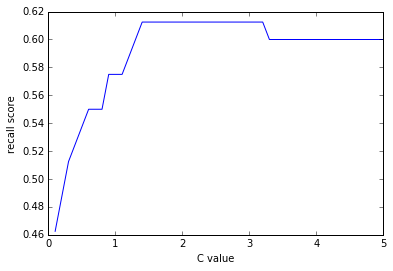

In [53]:
# Initial score look ok, but recall score of 55% is not great
# 
# Is there a way to automate the selection of the regularisation parameter value?
# Perhaps a loop that will set the regularisation parameter to one 
# which returns the highest recall rate - so we don't have to manually 
# tweak / trial and error
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
#This loop will try C values from 0 to 4.9, inc of 0.1
#For each C, a logistics regression object is created with the training data
#then used to predict the test results.  The recall rate is computed, and the highest
#rate is recorded.  

# Then we plot the recall value against the regularisation value
# so we can get an idea how they change together.
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [54]:
# Hmm, we are still not getting a great recall score over 70%
# Whatelse can we do?  
#
# Our source data had more non-diabetes results than diabetes results.
# Maybe this imbalance is causing us a problem?

### Logistic Regression with class_weight='balanced'


1st max value of 0.738 occured at C=0.300


Text(0,0.5,'recall score')

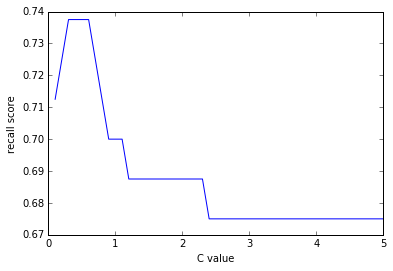

In [55]:
# We'll do the same code, but with the class_weight balanced
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [56]:
# now let's do logistic regression, using the best C value from the loop we just did
# And we''ll also include class_weight balanced here
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7143
[[106  45]
 [ 21  59]]

Classification Report
             precision    recall  f1-score   support

          0       0.83      0.70      0.76       151
          1       0.57      0.74      0.64        80

avg / total       0.74      0.71      0.72       231

0.7375


In [57]:
# Great! We are getting recall accuracy for 74%! 
# But be aware, we only ran this on one set of test data, and we kind of
# cheated by setting the regularisation value based on looping through
# this one set of test data.  Is there a way we can test this now-trained model
# on more data?  But note that we might have to trade off performance on
# the test set for improved performance on real-world data...  K fold!!


### LogisticRegressionCV

In [58]:
# ensemble algorithm, with logistic regression and k-fold cross-validation
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight='Balanced')
lr_cv_model.fit(X_train, y_train.ravel())
# Doing this split and retraining can be compute intensive - so try to 
# take advantage of our computer resources.  
#   n_jobs = -1 means 'use all cores on PC'
#   cv = 10, the number of folds
#   Cs = 3 - setting this to the number of values it will try trying to find the best regularsation value for the fold
#   There are a LOT of paramets for this algo, so we should understand what it can do for us

LogisticRegressionCV(Cs=3, class_weight='Balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

### Predict on the test data

In [59]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7489
[[126  25]
 [ 33  47]]

Classification Report
             precision    recall  f1-score   support

          0       0.79      0.83      0.81       151
          1       0.65      0.59      0.62        80

avg / total       0.74      0.75      0.75       231



In [60]:
# hmm our recall rate is pretty low here, but accuracy looks ok
# We will likely work better on real world data though.  
# We could also tinker with lots of the parameters to try to get the rate higher.
# We'll go with what we have for the moment.
#
# Let's keep trying for a couple of tweaks

### LogicisticRegressionCV version 2


In [61]:
# let's increase the number of folds and see what we get
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=20, refit=False, class_weight='Balanced')
lr_cv_model.fit(X_train, y_train.ravel())
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))


Accuracy: 0.7489
[[126  25]
 [ 33  47]]

Classification Report
             precision    recall  f1-score   support

          0       0.79      0.83      0.81       151
          1       0.65      0.59      0.62        80

avg / total       0.74      0.75      0.75       231



In [62]:
#No chnage there.  Let's put the no. of folds back, and used a different Cs
# let's increase the number of folds and see what we get
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=10, cv=10, refit=False, class_weight='Balanced')
lr_cv_model.fit(X_train, y_train.ravel())
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))



Accuracy: 0.7446
[[124  27]
 [ 32  48]]

Classification Report
             precision    recall  f1-score   support

          0       0.79      0.82      0.81       151
          1       0.64      0.60      0.62        80

avg / total       0.74      0.74      0.74       231



In [63]:
#Ok recall improved, let's increase Cs again
# let's increase the number of folds and see what we get
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=30, cv=10, refit=False, class_weight='Balanced')
lr_cv_model.fit(X_train, y_train.ravel())
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))



Accuracy: 0.7446
[[124  27]
 [ 32  48]]

Classification Report
             precision    recall  f1-score   support

          0       0.79      0.82      0.81       151
          1       0.64      0.60      0.62        80

avg / total       0.74      0.74      0.74       231



In [64]:
# Hmm I couldn't actually get my model to a good level of recall.
# I wonder what's gone wrong here?

# Using the trained model
### Save the model to file

In [65]:
from sklearn.externals import joblib  
joblib.dump(lr_cv_model, "./data/pima-trained-model.pkl")

['./data/pima-trained-model.pkl']

### load trained model from file

In [66]:
lr_cv_model = joblib.load("./data/pima-trained-model.pkl")

In [67]:
#now it's loaded, let's use it on some other data
# get data from truncated pima data file
df_predict = pd.read_csv("./data/pima-data-trunc.csv")
print(df_predict.shape)

(4, 10)


In [68]:
df_predict

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,1,89,66,23,94,28.1,0.167,21,0.9062,False
1,2,197,70,45,543,30.5,0.158,53,1.7730,True
2,7,100,0,0,0,30.0,0.484,32,0.0000,True
3,1,103,30,38,83,43.3,0.183,33,1.4972,False


In [69]:
#this data still has the skin/thickness pair, so remove skin
del df_predict['skin']
df_predict

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,False
1,2,197,70,45,543,30.5,0.158,53,True
2,7,100,0,0,0,30.0,0.484,32,True
3,1,103,30,38,83,43.3,0.183,33,False


In [70]:
#let's also drop the diabetes column, that's what we are trying to predict
# Store data without the column with the prefix X as we did with the X_train and X_test to indicate that it contains only the columns we are prediction.
X_predict = df_predict
del X_predict['diabetes']

In [71]:
#Data has 0 in places it should not, so impute that to clean up
#Impute with mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)
X_predict = fill_0.fit_transform(X_predict)

In [72]:
# now our data is ready to be used!


## Predict diabetes with the prediciton data, returns 1 if true, 0 if false

In [73]:
lr_cv_model.predict(X_predict)

array([0, 1, 0, 0])